In [ ]:
import tensorflow as tf

tf.executing_eagerly()

True

In [ ]:
!pip install fiftyone

     |████████████████████████████████| 2.4 MB 5.2 MB/s 
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 131 kB 42.1 MB/s 
     |████████████████████████████████| 13.2 MB 146 kB/s 
     |████████████████████████████████| 29.2 MB 24 kB/s 
     |████████████████████████████████| 224 kB 45.6 MB/s 
     |████████████████████████████████| 36.7 MB 67 kB/s 
     |████████████████████████████████| 557 kB 53.4 MB/s 
     |████████████████████████████████| 106 kB 64.1 MB/s 
     |████████████████████████████████| 79.9 MB 34 kB/s 
     |████████████████████████████████| 569 kB 60.2 MB/s 
     |████████████████████████████████| 526 kB 46.1 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████

In [ ]:
!pip install -U folium

     |████████████████████████████████| 94 kB 2.2 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1 which is incompatible.


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    classes=["person"],
)

 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 760.8Mb/s]      
Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |████████████████| 2693/2693 [4.0m elapsed, 0s remaining, 10.0 images/s]      
Writing annotations for 2693 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 2693/2693 [1.2m elapsed, 0s remaining, 43.4 samples/s]      
Dataset 'coco-2017-validation' created


In [ ]:
!rm -rf /root/fiftyone/coco-2017

In [ ]:
!zip -r /root/fiftyone.zip /root/fiftyone

  adding: root/fiftyone/ (stored 0%)
  adding: root/fiftyone/coco-2017/ (stored 0%)
  adding: root/fiftyone/coco-2017/raw/ (stored 0%)
  adding: root/fiftyone/coco-2017/raw/instances_train2017.json (deflated 67%)
  adding: root/fiftyone/coco-2017/raw/person_keypoints_val2017.json (deflated 70%)
  adding: root/fiftyone/coco-2017/raw/captions_val2017.json (deflated 79%)
  adding: root/fiftyone/coco-2017/raw/instances_val2017.json (deflated 67%)
  adding: root/fiftyone/coco-2017/raw/captions_train2017.json (deflated 80%)
  adding: root/fiftyone/coco-2017/raw/person_keypoints_train2017.json (deflated 70%)
  adding: root/fiftyone/coco-2017/validation/ (stored 0%)
  adding: root/fiftyone/coco-2017/validation/data/ (stored 0%)
  adding: root/fiftyone/coco-2017/validation/data/000000276285.jpg (deflated 3%)
  adding: root/fiftyone/coco-2017/validation/data/000000479953.jpg (deflated 0%)
  adding: root/fiftyone/coco-2017/validation/data/000000038118.jpg (deflated 7%)
  adding: root/fiftyone/coc

In [ ]:
from google.colab import files
files.download("/root/fiftyone.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

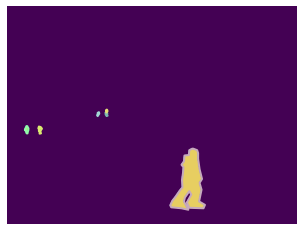

In [1]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from pycocotools.coco import COCO
import skimage.io as io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib inline # зачем?

dataDir='/root/fiftyone/coco-2017'
dataType='validation'
annFile='{}/{}/labels.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

def getClassName(classID, cats): # функиця для того, чтобы вывести название класса по его id
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(77, cats))

# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['person']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/{}/data/{}'.format(dataDir, dataType, img['file_name']))/255.0

plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)

In [22]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from pycocotools.coco import COCO
import skimage.io as io
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

def filterDataset(classes=None):    
    # initialize COCO api for instance annotations
    dataDir='/root/fiftyone/coco-2017'
    dataType='validation'
    annFile='{}/{}/labels.json'.format(dataDir,dataType)
    coco = COCO(annFile)
    
    images = []
    if classes!=None:
        # iterate for each individual class in the list
        for className in classes:
            # get all images containing given categories
            catIds = coco.getCatIds(catNms=className)
            imgIds = coco.getImgIds(catIds=catIds)
            images += coco.loadImgs(imgIds)
    
    else:
        imgIds = coco.getImgIds()
        images = coco.loadImgs(imgIds)
    
    # Now, filter out the repeated images
    unique_images = []
    for i in range(len(images)):
        if images[i] not in unique_images:
            unique_images.append(images[i])
            
    random.shuffle(unique_images)
    dataset_size = len(unique_images)
    
    return unique_images, dataset_size, coco

classes = ['person']

images, dataset_size, coco = filterDataset(classes)

def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return None

def getImage(imageObj, img_folder, input_image_size):
    # Read and normalize an image
    train_img = io.imread(img_folder + '/' + imageObj['file_name'])/255.0
    # Resize
    train_img = cv2.resize(train_img, input_image_size)
    if (len(train_img.shape)==3 and train_img.shape[2]==3): # If it is a RGB 3 channel image
        return train_img
    else: # To handle a black and white image, increase dimensions to 3
        stacked_img = np.stack((train_img,)*3, axis=-1)
        return stacked_img
    
def getNormalMask(imageObj, classes, coco, catIds, input_image_size):
    annIds = coco.getAnnIds(imageObj['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    cats = coco.loadCats(catIds)
    train_mask = np.zeros(input_image_size)
    for a in range(len(anns)):
        className = getClassName(anns[a]['category_id'], cats)
        pixel_value = classes.index(className)+1
        new_mask = cv2.resize(coco.annToMask(anns[a])*pixel_value, input_image_size)
        train_mask = np.maximum(new_mask, train_mask)

    # Add extra dimension for parity with train_img size [X * X * 3]
    train_mask = train_mask.reshape(input_image_size[0], input_image_size[1], 1)
    return train_mask  
    
def getBinaryMask(imageObj, coco, catIds, input_image_size):
    annIds = coco.getAnnIds(imageObj['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    train_mask = np.zeros(input_image_size)
    for a in range(len(anns)):
        new_mask = cv2.resize(coco.annToMask(anns[a]), input_image_size)
        
        #Threshold because resizing may cause extraneous values
        new_mask[new_mask >= 0.5] = 1
        new_mask[new_mask < 0.5] = 0

        train_mask = np.maximum(new_mask, train_mask.reshape(input_image_size[1], input_image_size[0]))

    # Add extra dimension for parity with train_img size [X * X * 3]
    train_mask = train_mask.reshape(input_image_size[1], input_image_size[0], 1)
    return train_mask


def dataGeneratorCoco(images, classes, coco, 
                      input_image_size=(224,224), batch_size=4):
    
    img_folder = '{}/{}/data'.format(dataDir, dataType)
    dataset_size = len(images)
    catIds = coco.getCatIds(catNms=classes)
    
    c = 0
    while(True):
        img = np.zeros((batch_size, input_image_size[1], input_image_size[0], 3)).astype('float')
        mask = np.zeros((batch_size, input_image_size[1], input_image_size[0], 1)).astype('float')

        for i in range(c, c+batch_size): #initially from 0 to batch_size, when c = 0
            imageObj = images[i]
            
            ### Retrieve Image ###
            train_img = getImage(imageObj, img_folder, input_image_size)
            
            ### Create Mask ###
            train_mask = getBinaryMask(imageObj, coco, catIds, input_image_size)              
            
            # Add to respective batch sized arrays
            img[i-c] = train_img
            mask[i-c] = train_mask
            
        c+=batch_size
        if(c + batch_size >= dataset_size):
            c=0
            random.shuffle(images)
        return img, mask # массивы numpy

training_images = len(imgIds) // 2 # batch
validation_images = len(imgIds) - training_images
input_image_size = (128, 128)

# val_gen = dataGeneratorCoco(images, classes, coco,
#                             input_image_size, batch_size)

def visualizeGenerator(gen):
    img, mask = next(gen)
    
    fig = plt.figure(figsize=(20, 10))
    outerGrid = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.1)
    
    for i in range(2):
        innerGrid = gridspec.GridSpecFromSubplotSpec(2, 2,
                        subplot_spec=outerGrid[i], wspace=0.05, hspace=0.05)

        for j in range(4):
            ax = plt.Subplot(fig, innerGrid[j])
            if(i==1):
                ax.imshow(img[j])
            else:
                ax.imshow(mask[j][:,:,0])
                
            ax.axis('off')
            fig.add_subplot(ax)        
    plt.show()

# visualizeGenerator(val_gen)

class DataGen(keras.utils.Sequence):
    def __init__(self, images, num):
        self.all_img, self.all_mask = dataGeneratorCoco(images, classes, coco, input_image_size, num)
        self.on_epoch_end()
    
    def __getitem__(self, index):

        # print('IMAGE SHAPE', self.all_img[index].shape)
        # print('MASK SHAPE', self.all_mask[index].shape)
        
        image = self.all_img[index]
        # mask = np.zeros((256, 256, 3))
        # mask[:, :, :-2] = self.all_mask[index]
        mask = self.all_mask[index]
        image = np.expand_dims(image, axis=0)
        mask = np.expand_dims(mask, axis=0)

        # print('IMAGE SHAPE (new)', image.shape)
        # print('MASK SHAPE (new)', mask.shape)

        return image, mask
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return len(self.all_img)

def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def UNet():
    f = [16, 32, 64, 128, 256]
    # inputs = keras.layers.Input((input_image_size[0], input_image_size[1], 3))
    inputs = keras.layers.Input((128, 128, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

import multiprocessing

def create_model_and_train( ):
  model = UNet()
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
  model.summary()

  train_gen = DataGen(images[:training_images], training_images)
  valid_gen = DataGen(images[:validation_images], validation_images)

  model.fit(train_gen, validation_data=valid_gen, steps_per_epoch=10, validation_steps=10, epochs=10)

p = multiprocessing.Process(target=create_model_and_train) 
p.start() 
p.join()

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
___________

In [ ]:
keras.backend.clear_session()

In [ ]:
!python manage.py clean_pyc

In [16]:
import numpy as np
N = 10
a = np.random.rand(N,N,1)
b = np.zeros((N,N,3))
b[:,:,:-2] = a
print(a.shape)
print(b.shape)
print(b)

(10, 10, 1)
(10, 10, 3)
[[[0.69949478 0.         0.        ]
  [0.72806791 0.         0.        ]
  [0.93866046 0.         0.        ]
  [0.65799151 0.         0.        ]
  [0.33438179 0.         0.        ]
  [0.76414632 0.         0.        ]
  [0.31796205 0.         0.        ]
  [0.16652596 0.         0.        ]
  [0.16663851 0.         0.        ]
  [0.4044928  0.         0.        ]]

 [[0.19621779 0.         0.        ]
  [0.97516022 0.         0.        ]
  [0.54702137 0.         0.        ]
  [0.62976378 0.         0.        ]
  [0.30242186 0.         0.        ]
  [0.62341577 0.         0.        ]
  [0.20409084 0.         0.        ]
  [0.05086103 0.         0.        ]
  [0.14694098 0.         0.        ]
  [0.82409527 0.         0.        ]]

 [[0.76769608 0.         0.        ]
  [0.65397524 0.         0.        ]
  [0.11115724 0.         0.        ]
  [0.4736073  0.         0.        ]
  [0.3882824  0.         0.        ]
  [0.65687663 0.         0.        ]
  [0.76309